Projekt MNwS - Aleksander Folfas 411052

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Zadanie 14

Za pomocą odpowiednich symulacji porównać moc klasycznego testu równości dwóch wartości
oczekiwanych i testu Manna-Whitneya. Porównanie przeprowadzić w przypadku, gdy dane pochodzą
z dwóch rozkładów normalnych różniących się wartościami oczekiwanymi. Uzyskane wyniki (np.
krzywe mocy testu) należy przedstawić na odpowiednich wykresach ilustrujących zmiany mocy
testów w zależności od:
- liczby danych,
- różnicy (ilorazu) odchyleń standardowych.

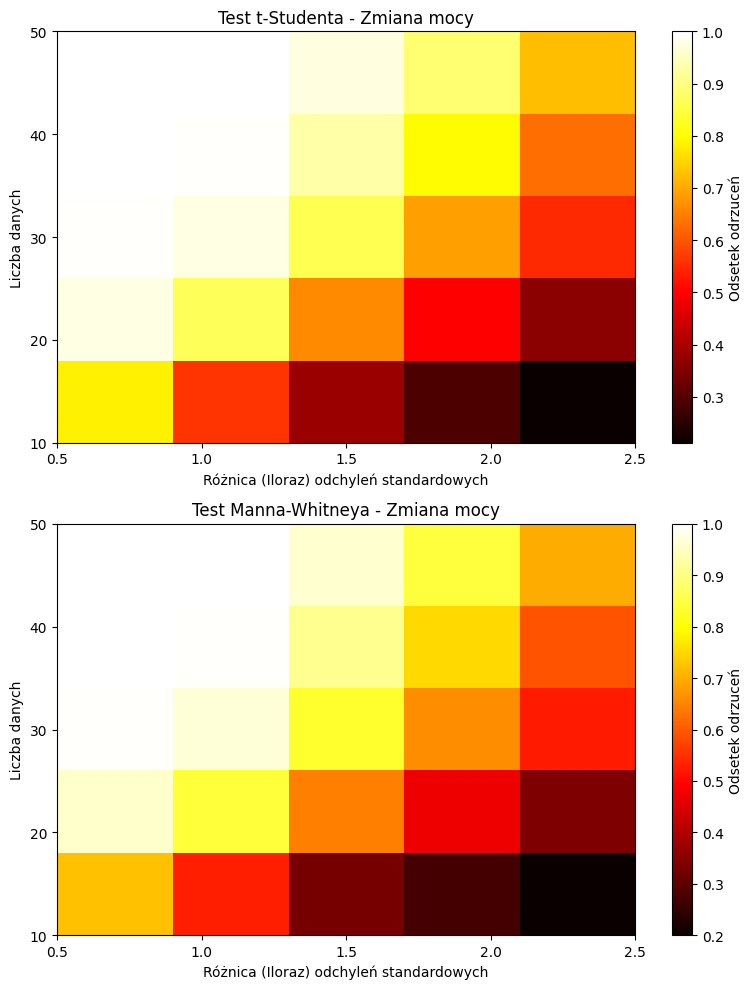

In [2]:
def power_comparison(n_samples, mean_diff, std_ratio, n_simulations=1000):
    t_power = []
    mw_power = []

    for _ in range(n_simulations):
        # Generowanie danych z dwóch rozkładów normalnych
        group1 = np.random.normal(loc=0, scale=1, size=n_samples)
        group2 = np.random.normal(loc=mean_diff, scale=std_ratio, size=n_samples)

        # Test t-Studenta (test równości średnich)
        t_stat, t_pvalue = stats.ttest_ind(group1, group2)
        t_power.append(t_pvalue < 0.05)

        # Test Manna-Whitneya
        mw_stat, mw_pvalue = stats.mannwhitneyu(group1, group2)
        mw_power.append(mw_pvalue < 0.05)

    t_power = np.mean(t_power)
    mw_power = np.mean(mw_power)

    return t_power, mw_power

# Parametry symulacji
n_samples_range = [10, 20, 30, 40, 50]
std_ratio_range = [0.5, 1, 1.5, 2, 2.5]

# Ziarno generatora liczb pseudolosowych
np.random.seed(411052)

t_powers = np.zeros((len(n_samples_range), len(std_ratio_range)))
mw_powers = np.zeros((len(n_samples_range), len(std_ratio_range)))

# Symulacje dla różnych wartości liczby danych i różnicy ilorazu odchyleń standardowych
for i, n_samples in enumerate(n_samples_range):
    for j, std_ratio in enumerate(std_ratio_range):
        t_power, mw_power = power_comparison(n_samples, 1, std_ratio)
        t_powers[i, j] = t_power
        mw_powers[i, j] = mw_power

# Wykresy
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

# Wykres zmiany mocy testu t-Studenta w zależności od liczby danych i różnicy ilorazu odchyleń standardowych
im1 = ax[0].imshow(t_powers, cmap='hot', origin='lower', extent=[0.5, 2.5, 10, 50], aspect='auto')
ax[0].set_title('Test t-Studenta - Zmiana mocy')
ax[0].set_xlabel('Różnica (Iloraz) odchyleń standardowych')
ax[0].set_ylabel('Liczba danych')
ax[0].set_xticks(std_ratio_range)
ax[0].set_yticks(n_samples_range)
fig.colorbar(im1, ax=ax[0], label='Odsetek odrzuceń')

# Wykres zmiany mocy testu Manna-Whitneya w zależności od liczby danych i różnicy ilorazu odchyleń standardowych
im2 = ax[1].imshow(mw_powers, cmap='hot', origin='lower', extent=[0.5, 2.5, 10, 50], aspect='auto')
ax[1].set_title('Test Manna-Whitneya - Zmiana mocy')
ax[1].set_xlabel('Różnica (Iloraz) odchyleń standardowych')
ax[1].set_ylabel('Liczba danych')
ax[1].set_xticks(std_ratio_range)
ax[1].set_yticks(n_samples_range)
fig.colorbar(im2, ax=ax[1], label='Odsetek odrzuceń')


plt.tight_layout()
plt.show()
